In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
df=pd.read_csv('SET_DATA.csv')
df.head()

C:\Users\chenx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (31,32,33,140,430,431) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MERGE_DATE,archive_upload_2229,FULL_GRYD_ID_FB,Processing_status,Manual_notes_ETO,no_intake_question,no_retest1_question,no_retest2_question,FEEDBACK_STATUS,date_feedback_uploaded_ETO,...,othgpnorms_4bins,othgpcohe_8bins,othgpID_8bins,othgpemo_8bins,LN_CRIME,LN_VIOLENCE,SETDirections_ETO,SiteName_ETO,PROGRAM_NAME_ETO,enroll_ETO_num
0,2/8/2019,,77th 2-13-1494-1,2.0,"Missing response(s) S11a text, s11b, x10 and x15",,,,2.0,2/8/2019,...,1,3,5,5,0,0,If individual is still receiving services in 6...,1,2,1
1,1/16/2015,,RPARSA-2-64-1,9.0,,,,,0.0,,...,1,4,5,3,0,1.6094379124341,,,,1
2,4/28/2014,,RPARSA-2-77-1,9.0,,,,,0.0,,...,9,9,9,9,1.79175946922805,.693147180559945,,1,,1
3,3/18/2019,,Northeast-25-68-2,1.0,,,,,2.0,3/18/2019,...,9,9,9,9,1.09861228866811,1.38629436111989,If individual is still receiving services in 6...,1,14,1
4,3/18/2019,,Northeast-25-69-2,1.0,,,,,2.0,3/18/2019,...,9,9,9,9,.693147180559945,.693147180559945,If individual is still receiving services in 6...,1,14,1


In [3]:
df.shape

(3416, 432)

remove empty columns


In [4]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
df.drop(empty_cols,
        axis=1,
        inplace=True)

sort by interview date

In [5]:
import datetime
from datetime import timedelta 

In [6]:
df['INTERVIEW_DATE_FB'] = pd.to_datetime(df['INTERVIEW_DATE_FB'])

In [7]:
df=df.sort_values('INTERVIEW_DATE_FB')

In [8]:
df.reset_index()

,index,MERGE_DATE,archive_upload_2229,FULL_GRYD_ID_FB,Processing_status,Manual_notes_ETO,no_intake_question,no_retest1_question,no_retest2_question,FEEDBACK_STATUS,...,othgpnorms_4bins,othgpcohe_8bins,othgpID_8bins,othgpemo_8bins,LN_CRIME,LN_VIOLENCE,SETDirections_ETO,SiteName_ETO,PROGRAM_NAME_ETO,enroll_ETO_num
0,2156,7/30/2018,,Northeast-20-306-1,1.0,CHANGE OF AGENCY 7/1/2018 - MISSING INFO PERMA...,,,,2.0,...,3,4,5,6,1.6094379124341,.693147180559945,If individual continues for a second cycle of ...,1,14,2
1,1545,3/16/2017,1,Mission-14-140-1,1.5,,,,,2.0,...,9,9,9,9,0,0,If individual is still receiving services in 6...,1,11,1
2,2757,6/5/2017,1,Southeast 3-10-24-1,1.5,,,,,2.0,...,1,3,6,2,.693147180559945,.693147180559945,If individual is still receiving services in 6...,1,21,1
3,2904,4/14/2017,1,BVCB-0-196-3,1.5,,,,,2.0,...,1,5,6,4,1.09861228866811,1.09861228866811,If individual continues for a second cycle of ...,1,22,2
4,2262,4/1/2019,,Olympic-25-95-1,2.0,"Missing response(s): interview date, push and ...",,,,2.0,...,2,3,5,4,1.38629436111989,1.09861228866811,If individual is still receiving services in 6...,1,15,1
5,2434,4/28/2014,1,RPARGR-0-239-1,1.5,,,,,2.0,...,9,9,9,9,0,0,If individual is still receiving services in 6...,1,17,1
6,2046,7/30/2018,,Northeast-20-108-2,1.0,1) No intake SET on record for this enrollment...,2,,,2.0,...,9,9,9,9,.693147180559945,1.09861228866811,If individual continues for a second cycle of ...,1,14,2
7,1992,4/27/2016,1,Newton 2-23-95-1,1.5,,,,,2.0,...,1,4,4,1,0,0,If individual is still receiving services in 6...,1,13,1
8,3018,10/14/2016,1,Southwest 1-15-277-1,1.5,,,,,2.0,...,1,3,4,4,0,0,If individual is still receiving services in 6...,1,22,1
9,2981,5/15/2017,1,BVCB-0-92-3,3.0,No intake SET on record for this enrollment: t...,1,,,2.0,...,1,3,8,4,.693147180559945,1.09861228866811,If individual continues for a second cycle of ...,1,22,2


change processing_status


In [9]:
df['Processing_status'] = df['Processing_status'].replace([1.5], 1)
df=df.loc[df['Processing_status']==1]

   select version 
  

In [10]:
df=df.loc[df['VERSION_1']=='1 Feb 2016']

In [11]:
df.shape

(2769, 432)

set the index based on unique id


In [12]:
df.set_index('ETO_ID_FB',inplace=True)

In [13]:
df.head()

,MERGE_DATE,archive_upload_2229,FULL_GRYD_ID_FB,Processing_status,Manual_notes_ETO,no_intake_question,no_retest1_question,no_retest2_question,FEEDBACK_STATUS,date_feedback_uploaded_ETO,...,othgpnorms_4bins,othgpcohe_8bins,othgpID_8bins,othgpemo_8bins,LN_CRIME,LN_VIOLENCE,SETDirections_ETO,SiteName_ETO,PROGRAM_NAME_ETO,enroll_ETO_num
ETO_ID_FB,,,,,,,,,,,,,,,,,,,,,
42720,7/30/2018,,Northeast-20-306-1,1.0,CHANGE OF AGENCY 7/1/2018 - MISSING INFO PERMA...,,,,2.0,7/31/2018,...,3,4,5,6,1.6094379124341,.693147180559945,If individual continues for a second cycle of ...,1,14,2
36074,3/16/2017,1,Mission-14-140-1,1.0,,,,,2.0,5/21/2018,...,9,9,9,9,0,0,If individual is still receiving services in 6...,1,11,1
28225,6/5/2017,1,Southeast 3-10-24-1,1.0,,,,,2.0,5/22/2018,...,1,3,6,2,.693147180559945,.693147180559945,If individual is still receiving services in 6...,1,21,1
37224,4/14/2017,1,BVCB-0-196-3,1.0,,,,,2.0,6/8/2018,...,1,5,6,4,1.09861228866811,1.09861228866811,If individual continues for a second cycle of ...,1,22,2
42721,7/30/2018,,Northeast-20-108-2,1.0,1) No intake SET on record for this enrollment...,2,,,2.0,7/31/2018,...,9,9,9,9,.693147180559945,1.09861228866811,If individual continues for a second cycle of ...,1,14,2


distribution of group_position

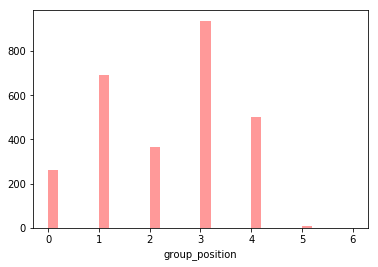

In [14]:
sns.distplot(df['group_position'],bins=30,kde=False,color='red')


change admin number based on intake/retest


In [15]:
df.loc[df['intake'] == 1, 'SET_admin_num'] = 1

In [16]:
df.loc[df['retest'] == 1, 'SET_admin_num'] = 2

In [17]:
df.loc[df['retest'] == 2, 'SET_admin_num'] = 3

In [18]:
df.loc[df['retest'] == 3, 'SET_admin_num'] = 4

In [19]:
df[(df['intake']==777) & (df['retest']==777)].count().head()
#information in retest & intake is complete

MERGE_DATE             0
archive_upload_2229    0
FULL_GRYD_ID_FB        0
Processing_status      0
Manual_notes_ETO       0
dtype: int64

In [20]:
df.loc[df['SET_admin_num'].isnull()]
#SET_admin is complete

,MERGE_DATE,archive_upload_2229,FULL_GRYD_ID_FB,Processing_status,Manual_notes_ETO,no_intake_question,no_retest1_question,no_retest2_question,FEEDBACK_STATUS,date_feedback_uploaded_ETO,...,othgpnorms_4bins,othgpcohe_8bins,othgpID_8bins,othgpemo_8bins,LN_CRIME,LN_VIOLENCE,SETDirections_ETO,SiteName_ETO,PROGRAM_NAME_ETO,enroll_ETO_num
ETO_ID_FB,,,,,,,,,,,,,,,,,,,,,


 change meaningless numbers to NAN

In [21]:
for i in range(df.shape[1]):
    df.iloc[:,i]= df.iloc[:,i].replace([555, 777,888,999,'555','777','888','999' ], np.nan)

extract useful info

In [22]:
basic_info=df.loc[:, ['GRYD_ETO_ID','INTERVIEW_DATE_FB','SET_admin_num','AGE_1_FB','SEX_1','GRYD_Zone_num','group_position']]

In [23]:
question=df.loc[:,'PAGE_3':'END_OF_SET_QUESTIONS']

In [24]:
newdf=pd.concat([basic_info,question], axis=1)

In [25]:
newdf

,GRYD_ETO_ID,INTERVIEW_DATE_FB,SET_admin_num,AGE_1_FB,SEX_1,GRYD_Zone_num,group_position,PAGE_3,S1,S2,...,CIW_CLIENT_ID,CIW_INTERVIEW_DATE,CIW_COMPLETED_DATE,CIW1,CIW2,CIW3,CIW4,CIW5,CIW6_COMMENTS,END_OF_SET_QUESTIONS
ETO_ID_FB,,,,,,,,,,,,,,,,,,,,,
42720,Northeast-20-306-1,1999-09-09,2,18.0,1,14,1,,0.0,0.0,...,,,,,,,,,no page 17 completed,
36074,Mission-14-140-1,1999-09-09,1,17.0,1,11,2,,0.0,0.0,...,Mission-14-140-1,,,,,,,,no page 17 completed,
28225,Southeast 3-10-24-1,1999-09-09,1,NaN,2,21,2,,1.0,1.0,...,Southeast 3-10-24-1,,,,,,,,no page 17 completed,
37224,BVCB-0-196-3,1999-09-09,2,24.0,1,22,4,,0.0,0.0,...,BVCB-0-196-3,9/9/1999,9/9/1999,1,4,4,1,2,Client has maintained focus at school & doing ...,
42721,Northeast-20-108-2,1999-09-09,2,20.0,1,14,4,,1.0,1.0,...,,,,,,,,,no page 17 completed,
32195,Newton 2-23-95-1,1999-09-09,1,14.0,2,13,1,,0.0,0.0,...,Newton 2-23-95-1,4/12/2016,4/13/2016,3,2,1,NaN,9,Blank,
34254,Southwest 1-15-277-1,1999-09-09,1,21.0,1,22,3,,0.0,1.0,...,Southwest 1-15-277-1,7/27/2016,8/12/2016,1,3,3,1,2,Client is a low level gang member that wants t...,
40450,77th 3-20-231-1,1999-09-09,1,24.0,2,3,2,,0.0,0.0,...,77th 3-20-231-1,,,,,,,,no page 17 completed,
28185,Southeast 3-10-17-1,1999-09-09,1,24.0,2,21,2,,1.0,1.0,...,Southeast 3-10-17-1,,,,,,,,no page 17 completed,


###  manually change interview_date 1999  and resort the date

In [26]:
newdf.iloc[0,1]=datetime.datetime(2018, 1, 6)

In [27]:
newdf.iloc[1,1]=datetime.datetime(2016, 9, 19)

In [28]:
newdf.iloc[2,1]=datetime.datetime(2015, 7, 21)

In [29]:
newdf.iloc[3,1]=datetime.datetime(2017, 4, 17)

In [30]:
newdf.iloc[4,1]=datetime.datetime(2017, 11, 15)

In [31]:
newdf.iloc[5,1]=datetime.datetime(2016, 3, 21)

In [32]:
newdf.iloc[6,1]=datetime.datetime(2016, 7, 8)

In [33]:
newdf.iloc[7,1]=datetime.datetime(2017, 7, 7)

In [34]:
newdf.iloc[8,1]=datetime.datetime(2015, 7, 23)

In [35]:
newdf.iloc[9,1]=datetime.datetime(2015, 7, 23)

In [36]:
newdf.iloc[10,1]=datetime.datetime(2015, 7, 26)

In [37]:
newdf.iloc[11,1]=datetime.datetime(2016, 3, 3)

In [38]:
newdf.iloc[12,1]=datetime.datetime(2016, 11, 16)

In [39]:
newdf=newdf.sort_values('INTERVIEW_DATE_FB')

In [40]:
newdf.shape

(2769, 254)

seperate retest

In [41]:
intake=newdf.loc[newdf['SET_admin_num']==1]

In [42]:
retest=newdf.loc[(newdf['SET_admin_num']==2)]

In [43]:
retest.shape

(643, 254)

In [44]:
newdf.to_csv('SET_processed.csv', index = False)